In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# block the pig graph analysis
class btp_graph:
    
    def __init__(self,n):
        self.matrix = np.zeros((n,n))
        self.n = n
        self.graph = None  # https://networkx.org/documentation/latest/reference/functions.html#
        self.end_verticies = []
    def create_edge(self,i,j,w=1.): # i (vertex), j (vertex), w (int weight)
        self.matrix[i,j] = w
        self.matrix[j,i] = w

    def remove_edge(self,i,j):
        self.matrix[i,j] = 0
        self.matrix[j,i] = 0
        
    def get_edge_list(self,vertex): # returns list of connected vertexes
        edge_list = []
        for i,ele in enumerate(self.matrix[vertex]):
            if ele > 0:
                edge_list.append(i)
        return edge_list
    
    def remove_node(self,verticies):
        for v in verticies:
            self.graph.remove_node(v)
        
    def generate_btp_matrix(self):
        self.end_verticies = [0,1,2,3,4,5,9,10,14,15,19,20,24,25,29,30,34,39,40,44,49,50,51,52,53,54]
        for i in range(54):
            if ((i+1) % 5) != 0:
                btp.create_edge(i,i+1)

        for i in range(0,49,10):
            for j in range(5):
                btp.create_edge(i+j,i+j+5)
        for i in range(1,49,10):
            for j in range(4):
                if i+j == 0:
                    continue
                btp.create_edge(i+j,i+j+4)

        for i in range(5,49,10):
            for j in range(4):
                if i+j == 49:
                    continue
                btp.create_edge(i+j,i+j+6)
        for i in range(5,49,10):
            for j in range(5):
                btp.create_edge(i+j,i+j+5)
                
        self.graph = nx.MultiGraph(self.matrix,name="Block the Pig")
        
    def info(self):
        print(nx.info(self.graph))
    
    def display(self,graph):
        nx.draw_spectral(graph,with_labels=True)
        
    def copy(self,graph):
        return graph.copy()
    
    # BFS find edge from pig    
    def BFS(self, vertex, end_verticies,blocked=[],margin=0): # from vertex to any in verticies, but not including blocked verticies
        if vertex in end_verticies:
            return [vertex]
        queue = [[vertex]]
        visited = []
        paths = []
        while len(queue) > 0:# v[-1] not in verticies:
            v = queue.pop(0)
            if v[-1] in end_verticies:
                paths.append(v)
                if len(v) > len(paths[0]) + margin: # path filter
                    return paths[:-1]
            visited.append(v[-1])
            for x in nx.all_neighbors(self.graph,v[-1]):
                if x not in visited and x not in blocked:
                    queue.append(v + [x])
        return paths[:-1]

In [3]:
# create graph object
btp = btp_graph(55)
btp.generate_btp_matrix()

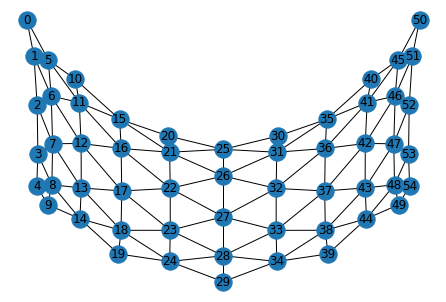

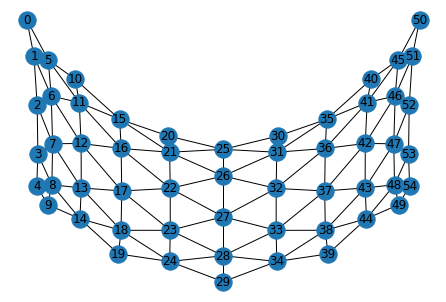

In [4]:
# draw graph
btp.display(btp.graph)
# plt.savefig("game_graph.png") # save as png

In [6]:
# brute force O(12^max_depth) which is the reason for an alternative approach utilizing NN
def solver(initial,end_verticies,blocked=[],pig_pos=27,n=0,max_depth=55,depth=0):
    if depth > max_depth:
        return []
    current_pig = pig_pos
    if n >= 3: # find pigs next move
        paths = btp.BFS(current_pig,btp.end_verticies,blocked + initial)
        if len(paths) == 0:
#                 print("Win")
            return blocked
#         movs = []
#         for path in paths:
#             if path[1] not in movs:
#                 movs.append(path[1])
#         subres = []
#         for move in movs:
#             subres.append(len(btp.BFS(move,btp.end_verticies,blocked + initial)))
#         current_pig = movs[np.argmin(subres)]
        current_pig = paths[0][1]
        if current_pig in end_verticies:
            return []
    n += 1
#     options = [j for j in range(current_pig-6,current_pig+6)]
    options = []
    for path in btp.BFS(current_pig,btp.end_verticies,blocked + initial,margin=3):
        for move in path[1:]:
            if move not in options:
                options.append(move)
    for next_move in options:
        if next_move not in blocked and next_move not in initial:
            blocked = solver(initial,end_verticies,blocked + [next_move],current_pig,n,max_depth,depth + 1)
            if blocked != []:
                return blocked
    return []

In [7]:
def autoplay():
    pass

In [9]:
initial = [5,11,13,21,31,32,35,46,49]
ans = solver(initial,btp.end_verticies,max_depth=12)
ans

KeyboardInterrupt: 

KeyboardInterrupt: 

In [ ]:
# solved
# [2,7,10,13,16,17,25,31,33,38,39,46] 
# [8,11,17,22,23,29,31,38,39,45,47] 
# [6,13,14,30,38,41,42,43,45,47] 
# [5,6,7,8,10,12,14,18,24,29,32,34,46] 
# couldn't solve
# [5,11,13,21,31,32,35,46,49] 